# World Health Statistics 2020 -Visual Summary

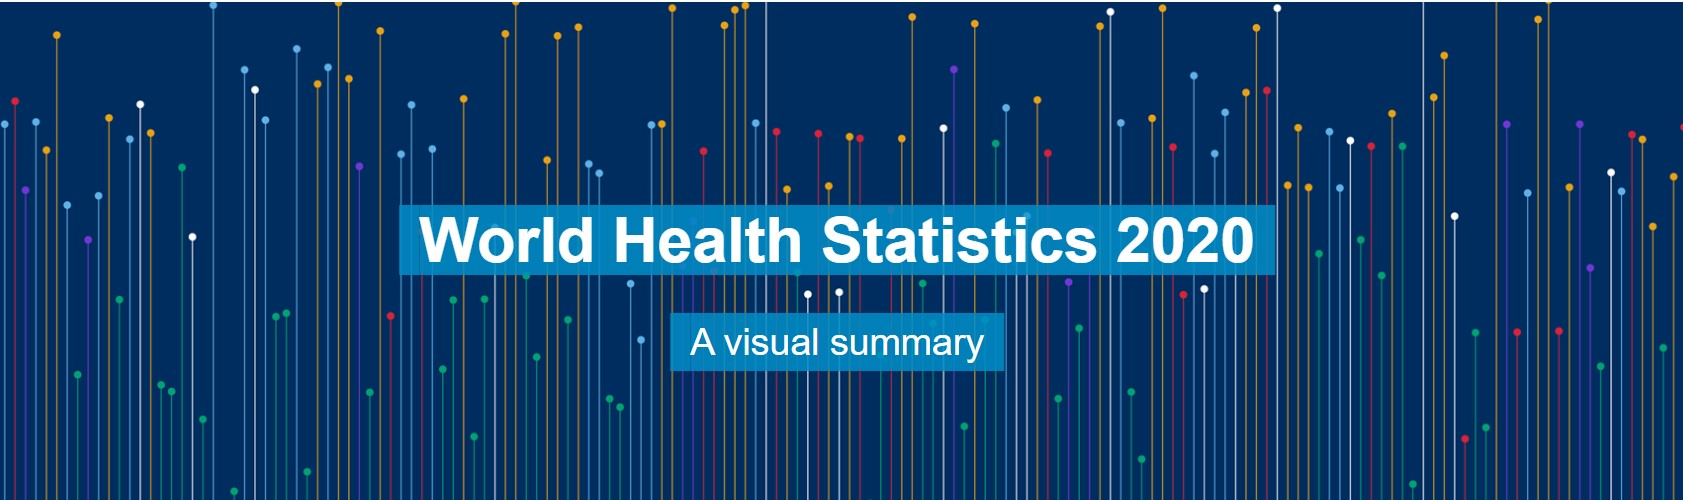

In [1]:
import os
from IPython.display import Image
Image(filename="../input/meta-data-files/WHO-vis.jpg", width= 1000, height=400)

WHO's annual World Health Statistics reports present the most recent health statistics for the WHO Member States. The yearly statistics is for monitoring health for the sustainable development goals (SDGs) and which member states are fully commited to.

Towards recreating the Visual summary of World Heatlh statistics 2020 reported by WHO. This notebook is created with the goal of visualizing the summary of Health data on few important aspects of the world

In [2]:
!pip install pycountry_convert

     |████████████████████████████████| 242 kB 1.2 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pycountry_convert as pc
import json 
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

## Healthy Life Expectancy (HALE)

Life expectancy gives an indication of how long a population is expected to live on average. But Healthy Life Expectancy (HALE) reveals the true health of a population. It’s about both length of life and quality of life. Not just the number of years the average person lives, but the number of years they can expect to live in good health.

In [4]:
life_exp_birth = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/ofHaleInLifeExpectancy.csv')
print('HALE Data')
life_exp_birth.head()

HALE Data


,Location,Period,Indicator,Dim1,Hale Expectency,Life expectany,Unnamed: 6,% OF HALE in life expectancy
0,Africa,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,56.04,64.49,86.897193,87
1,Africa,2019,Healthy life expectancy (HALE) at birth (years),Male,55.00,62.37,88.183422,88
2,Africa,2019,Healthy life expectancy (HALE) at birth (years),Female,57.09,66.65,85.656414,86
3,Africa,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,54.42,62.56,86.988491,87
4,Africa,2015,Healthy life expectancy (HALE) at birth (years),Male,53.38,60.47,88.275178,88


In [5]:
HALE = life_exp_birth[life_exp_birth['Dim1']=='Both sexes'][['Period','Hale Expectency']].groupby('Period').mean()
fig = go.Figure(
    data= go.Scatter(x=HALE.index, y=HALE['Hale Expectency'].values,mode='markers+lines'))
fig.update_layout(title='HALE Expectency over the years between 2000 and 2019')
fig.show()

HALE increased globally by 8% from 59 years to 63 from 2000 to 2019

**Across the world, where are people living healthier lives?**

Based on the data reported in Life and HALE expectencies, the region of healthier people can be visualized

In [6]:
life_exp_birth_all = life_exp_birth[life_exp_birth['Dim1']=='Both sexes']
life_exp_birth_all.sort_values(by='Period',inplace=True)

x=[]
year=[]
y=[]
color=[]
for r, c in life_exp_birth_all.iterrows():
    loc, per,_,_,he,le,_,perc_hale = life_exp_birth_all.loc[r].values
    x.append(loc)
    year.append(per)
    y.append(he)
    color.append('Hale Expectancy')
    x.append(loc)
    year.append(per)
    y.append(le)
    color.append('Life Expectancy')
    x.append(loc)
    year.append(per)
    y.append(perc_hale)
    color.append('% OF HALE in life expectancy')
    
df=pd.DataFrame()
df['x']=x
df['y']=y
df['year']=year
df['color']=color

animals=df['x'].unique()

fig = go.Figure(data=[
    go.Bar(name='Life Expectancy', x=animals, y=df[(df['year']==2000) & (df['color']=='Life Expectancy')]['y'].values),
    go.Bar(name='Hale Expectancy', x=animals, y=df[(df['year']==2000) & (df['color']=='Hale Expectancy')]['y'].values),
go.Bar(name='% of Hale Expectancy in LE', x=animals, y=df[(df['year']==2000) & (df['color']=='% OF HALE in life expectancy')]['y'].values)],
                layout=go.Layout(
        xaxis=dict(range=[-1, 6], autorange=False),
        yaxis=dict(range=[45,100], autorange=False),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None,{"frame": {"duration": 2000, 
                                                                        "redraw": True},
                                                              "fromcurrent": True, 
                                                              "transition": {"duration": 0}}])])]),
                frames=[go.Frame(data=[
    go.Bar(name='Life Expectancy', x=animals, y=df[(df['year']==2000) & (df['color']=='Life Expectancy')]['y'].values),
    go.Bar(name='Hale Expectancy', x=animals, y=df[(df['year']==2000) & (df['color']=='Hale Expectancy')]['y'].values),
                go.Bar(name='% of Hale Expectancy in LE', x=animals, y=df[(df['year']==2000) & (df['color']=='% OF HALE in life expectancy')]['y'].values)],name='2000'),
                    
                    go.Frame(data=[
    go.Bar(name='Life Expectancy', x=animals, y=df[(df['year']==2010) & (df['color']=='Life Expectancy')]['y'].values),
    go.Bar(name='Hale Expectancy', x=animals, y=df[(df['year']==2010) & (df['color']=='Hale Expectancy')]['y'].values),
                go.Bar(name='% of Hale Expectancy in LE', x=animals, y=df[(df['year']==2010) & (df['color']=='% OF HALE in life expectancy')]['y'].values)],name='2010'),
            go.Frame(data=[
    go.Bar(name='Life Expectancy', x=animals, y=df[(df['year']==2015) & (df['color']=='Life Expectancy')]['y'].values),
    go.Bar(name='Hale Expectancy', x=animals, y=df[(df['year']==2015) & (df['color']=='Hale Expectancy')]['y'].values),
            go.Bar(name='% of Hale Expectancy in LE', x=animals, y=df[(df['year']==2015) & (df['color']=='% OF HALE in life expectancy')]['y'].values)],name='2015'),
            go.Frame(data=[
    go.Bar(name='Life Expectancy', x=animals, y=df[(df['year']==2019) & (df['color']=='Life Expectancy')]['y'].values),
    go.Bar(name='Hale Expectancy', x=animals, y=df[(df['year']==2019) & (df['color']=='Hale Expectancy')]['y'].values),
            go.Bar(name='% of Hale Expectancy in LE', x=animals, y=df[(df['year']==2019) & (df['color']=='% OF HALE in life expectancy')]['y'].values)],name='2019',
                     layout=go.Layout(title_text="HALE Expectencies over the years across the regions"))]
)

for i, frame in enumerate(fig.frames):
    frame.layout.title = "Year: {}".format(df['year'].unique()[i])

# for step in fig.layout.sliders[0].steps:
#     step["args"][1]["frame"]["redraw"] = True
# fig.update_layout(frames =frames)

fig.show()

This visualization reveals the interplay between life expectancy and healthy life expectancy, and allows us to see how this has changed between 2000 and 2019.HALE has increased globally during this time period. Yet from this chart, we can see there are many disparities between regions.

Countries in the region of Africa might have a large proportion of life is healthy, the average healthy life might not be long represented by the HALE expectancy. We want to achieve equality across all regions. But currently there is a clear difference in equity between Africa and Europe.

## Death, Disease and Intervention

These visualizations highlight the progress made in recent decades, where we stand today and reveal the challenges we still face.


## How mortality rates have decreased over the past two decades?

* Under 5 mortality rate: The risk of a child dying before their fifth birthday.

In [7]:
map_cont={}
map_cont['AF'] ='Africa'
map_cont['AS'] ='Asia'
map_cont['EU'] ='Europe'
map_cont['NA'] = 'North America'
map_cont['OC'] ='Oceania'
map_cont['SA'] = 'South America'

In [8]:
mortality_rate =pd.read_csv('../input/who-worldhealth-statistics-2020-complete/under5MortalityRate.csv')
print('Under 5 mortality rate')
mortality_rate.head()

Under 5 mortality rate


,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Under-five mortality rate (probability of dyin...,Both sexes,60.27 [47.44-74.62]
1,Afghanistan,2019,Under-five mortality rate (probability of dyin...,Male,63.83 [50.04-79.16]
2,Afghanistan,2019,Under-five mortality rate (probability of dyin...,Female,56.57 [44.54-70.18]
3,Afghanistan,2018,Under-five mortality rate (probability of dyin...,Both sexes,62.54 [50.64-75.41]
4,Afghanistan,2018,Under-five mortality rate (probability of dyin...,Male,66.08 [53.41-79.76]


In [9]:
with open('../input/meta-data-files/country2code.json') as json_file: 
    country2code = json.load(json_file) 


In [10]:
mortality_rate['Rate'] = mortality_rate['First Tooltip'].str.split('[',n=2,expand=True)[0].astype('float')
mortality_rate=mortality_rate.query("Period>=2000")
mortality_rate['iso_alpha'] = mortality_rate['Location'].map(country2code)
mortality_rate.dropna(inplace=True)
cont=[]
for r,c in mortality_rate.iterrows():
    country_code = mortality_rate.loc[r,'iso_alpha']
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    
    cont.append(continent_name)
mortality_rate['continent'] =cont
mortality_rate['continent'] =mortality_rate['continent'].map(map_cont)
mortality_rate.sort_values(by='Period',inplace=True)
fig = px.scatter_geo(mortality_rate, locations="Location", color="continent", size="Rate",
                     projection="natural earth", locationmode='country names',animation_frame="Period")
fig.show()

The lesser bubbles across the years of the charts reveals major progress has been made in under-5 mortality. This is due, in part, to gains made in vaccination coverage for specific diseases. We can see that under-5 mortality remains a significant problem in Africa, where the rate is more than eight times higher than the European region.

* Maternal mortality ratio: The death of women as a result of complications during or following pregnancy and childbirth. 


In [11]:
maternal_mortality =pd.read_csv('../input/who-worldhealth-statistics-2020-complete/maternalMortalityRatio.csv')
print('Maternal mortality data')
maternal_mortality.head()

Maternal mortality data


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Maternal mortality ratio (per 100 000 live bir...,638 [427-1010]
1,Afghanistan,2016,Maternal mortality ratio (per 100 000 live bir...,673 [457-1040]
2,Afghanistan,2015,Maternal mortality ratio (per 100 000 live bir...,701 [501-1020]
3,Afghanistan,2014,Maternal mortality ratio (per 100 000 live bir...,786 [592-1080]
4,Afghanistan,2013,Maternal mortality ratio (per 100 000 live bir...,810 [617-1080]


In [12]:
maternal_mortality['Rate'] = maternal_mortality['First Tooltip'].str.split('[',n=2,expand=True)[0].astype('float')
maternal_mortality=maternal_mortality.query("Period>=2000")
maternal_mortality['iso_alpha'] = maternal_mortality['Location'].map(country2code)
maternal_mortality.dropna(inplace=True)
cont=[]
for r,c in maternal_mortality.iterrows():
    country_code = maternal_mortality.loc[r,'iso_alpha']
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    
    cont.append(continent_name)
maternal_mortality['continent'] =cont
maternal_mortality['continent'] = maternal_mortality['continent'].map(map_cont)
maternal_mortality.sort_values(by='Period',inplace=True)
fig = px.scatter_geo(maternal_mortality, locations="Location", color="continent", size="Rate",
                     projection="natural earth", locationmode='country names',animation_frame="Period")
fig.show()

This reflects the global inequalities in access to quality health care. Most maternal deaths are preventable. We can see from the chart above not only how much progress has been made in reducing maternal mortality but also where more efforts are needed. There is way too significant difference between Europe and Africa

### Malaria, tuberculosis and HIV incidence rates globally

In [13]:
malaria =pd.read_csv('../input/who-worldhealth-statistics-2020-complete/incedenceOfMalaria.csv')
malaria.columns =['Location','Indicator','Period','malaria_rate']
malaria = malaria[['Location','Period','malaria_rate']]
print('Incidence of Malaria data')
malaria.head()

Incidence of Malaria data


,Location,Period,malaria_rate
0,Afghanistan,2018,29.01
1,Afghanistan,2017,27.07
2,Afghanistan,2016,26.11
3,Afghanistan,2015,14.91
4,Afghanistan,2014,12.67


In [14]:
hiv =pd.read_csv('../input/who-worldhealth-statistics-2020-complete/newHivInfections.csv')
hiv.columns =['Location','Period','Indicator','Dim1','hiv_rate']
hiv= hiv[hiv['Dim1']=='Both sexes']

hiv['hiv_rate'] = hiv['hiv_rate'].str.split('[',n=2,expand=True)[0]

hiv['hiv_rate'] = hiv['hiv_rate'].replace({'<0.01 ':'0.009', 
                                           'No data': np.nan}).astype('float')
hiv.dropna(inplace=True)
hiv = hiv[['Location','Period','hiv_rate']]
print('New HIV infections data')
hiv.head()

New HIV infections data


,Location,Period,hiv_rate
0,Afghanistan,2019,0.04
3,Afghanistan,2015,0.03
6,Afghanistan,2010,0.03
9,Afghanistan,2005,0.02
12,Afghanistan,2000,0.01


In [15]:
tb = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/incedenceOfTuberculosis.csv')
tb.columns =['Location','Indicator','Period','tb_rate']
tb['tb_rate'] = tb['tb_rate'].str.split('[',n=2,expand=True)[0].astype('float')
tb=tb[['Location','Period','tb_rate']]
print('Incidence of Tuberculosis data')
tb.head()

Incidence of Tuberculosis data


,Location,Period,tb_rate
0,Afghanistan,2019,189.0
1,Afghanistan,2018,189.0
2,Afghanistan,2017,189.0
3,Afghanistan,2016,189.0
4,Afghanistan,2015,189.0


In [16]:
disease = pd.merge(malaria, tb,  how='left', left_on=['Location','Period'], right_on = ['Location','Period'])
disease = pd.merge(disease, hiv,  how='left', left_on=['Location','Period'], right_on = ['Location','Period'])
disease=disease.query("Period>=2000")
disease['iso_alpha'] = disease['Location'].map(country2code)
disease.dropna(inplace=True)
cont=[]
for r,c in disease.iterrows():
    country_code = disease.loc[r,'iso_alpha']
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    
    cont.append(continent_name)
disease['continent'] =cont
disease['continent'] =disease['continent'].map(map_cont)
disease=disease.groupby(['continent','Period']).mean()
disease = disease.reset_index()

anim_map={}
for i in range(len(disease['Period'].unique())):
    anim_map[i] = disease['Period'].unique()[i]
color_map={}
color_map['Africa'] ='firebrick'
color_map['Asia'] = 'royalblue'
color_map['North America'] = 'indigo'
color_map['Oceania'] ='yellow'
color_map['South America'] = 'green'


fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("Malaria Incidence", "TB Incidence", "New HIV Infections"))
for cont in disease['continent'].unique():
# Add traces
    fig.add_trace(go.Scatter(x=disease[disease['continent']==cont]['Period'].values, 
                         y=disease[disease['continent']==cont]['malaria_rate'].values,
                    mode='lines+markers',
                    name=cont,line=dict(color=color_map[cont], width=2,dash='dot')), row=1,col=1)
for cont in disease['continent'].unique():
# Add traces
    fig.add_trace(go.Scatter(x=disease[disease['continent']==cont]['Period'].values, 
                         y=disease[disease['continent']==cont]['tb_rate'].values,
                    mode='lines+markers',
                    name=cont,line=dict(color=color_map[cont], width=2,dash='dot'),showlegend=False), row=2,col=1)
for cont in disease['continent'].unique():
# Add traces
    fig.add_trace(go.Scatter(x=disease[disease['continent']==cont]['Period'].values, 
                         y=disease[disease['continent']==cont]['hiv_rate'].values,
                    mode='lines+markers',
                    name=cont,line=dict(color=color_map[cont], width=2,dash='dot'),showlegend=False), row=3,col=1)
# fig.update_layout(coloraxis=dict(colorbar=['maroon','green','violet','blue','indigo']), showlegend=False)
fig.update_layout(height=800, width=1000, title_text="Malaria, tuberculosis and HIV incidence rates globally")
fig.show()

Infectious diseases such as malaria, tuberculosis (TB) and HIV have long been some of the world’s biggest killers. 

The African region still lags far behind the global average in all three, yet the past two decades have seen dramatic progress. Incidences of HIV, TB and malaria have decreased globally since 2000, yet they still pose a major threat

## Health workforce

A well-prepared health workforce under adequate working conditions is essential to strong health systems. Health professionals such as medical doctors and nurses are the people who respond to both emergencies and everyday needs

### Number of people for every single Nurse/midwife

In [17]:
nursing =pd.read_csv('../input/who-worldhealth-statistics-2020-complete/nursingAndMidwife.csv')
print('Nurse/Midewife global data')
nursing.head()

Nurse/Midewife global data


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,"Nursing and midwifery personnel (per 10,000)",1.76
1,Afghanistan,2016,"Nursing and midwifery personnel (per 10,000)",1.48
2,Afghanistan,2015,"Nursing and midwifery personnel (per 10,000)",1.30
3,Afghanistan,2014,"Nursing and midwifery personnel (per 10,000)",1.48
4,Afghanistan,2013,"Nursing and midwifery personnel (per 10,000)",2.50


Text(0.5, 0.98, 'Number of people for every single Nurse/midwife')

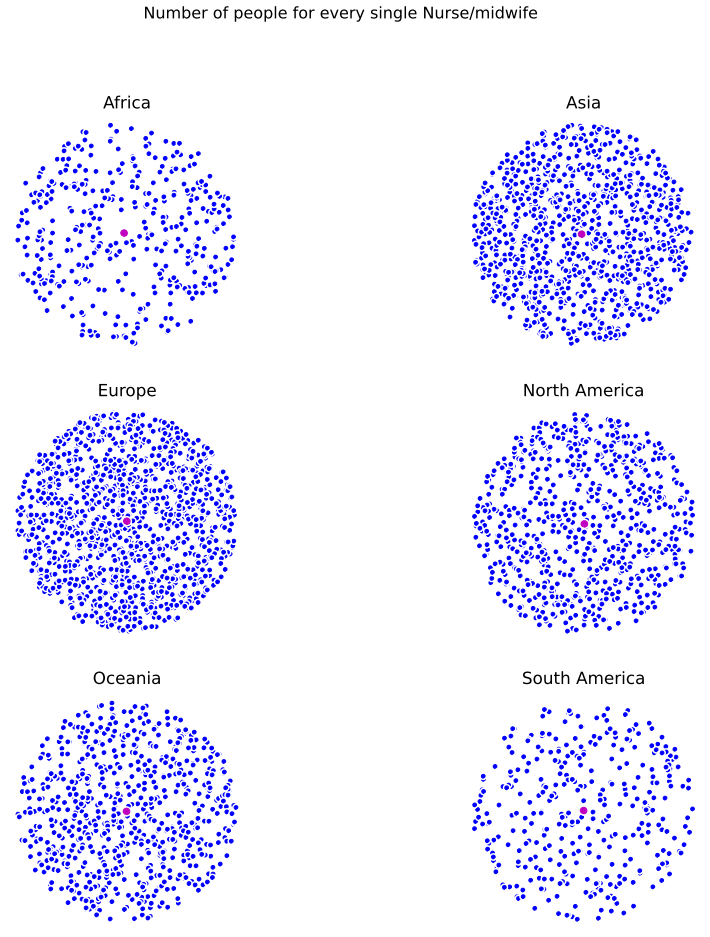

In [18]:
nursing['iso_alpha'] = nursing['Location'].map(country2code)
nursing.dropna(inplace=True)
cont=[]
for r,c in nursing.iterrows():
    country_code = nursing.loc[r,'iso_alpha']
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    
    cont.append(continent_name)
nursing['continent'] =cont
nursing['continent'] =nursing['continent'].map(map_cont)
nursing=nursing.groupby(['continent','Period']).sum()
nursing = nursing.reset_index()

df =nursing[nursing['Period']==2018]
plt.xkcd()
fig =plt.figure(figsize=(15,15))
for i in range(len(df)):
    Nmax = int(df.iloc[i,2])
    R = int(df.iloc[i,2]/200)
    r2 = R * np.sqrt(np.random.rand(Nmax, 1))
    theta2 = 2 * np.pi * np.random.rand(Nmax, 1)
    x2 = r2 * np.cos(theta2)
    y2 = r2 * np.sin(theta2)
    plt.subplot(3,2,i+1)
    plt.plot(x2,y2,'b.')
    plt.plot(0, 0, 'mo')
    plt.xlim((-1.1*R,1.1*R))
    plt.ylim((-1.1*R,1.1*R))
    plt.axis('square')
    plt.axis('off')
    plt.title(df.iloc[i,0])
fig.suptitle('Number of people for every single Nurse/midwife', fontsize=16)

Each dot represents one person and each dot at the center represent single Nurse/midwife

### Number of people for every single Medical Doctor

In [19]:
doctors =pd.read_csv('../input/who-worldhealth-statistics-2020-complete/medicalDoctors.csv')
print('Medical Doctors global data')
doctors.head()

Medical Doctors global data


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41


Text(0.5, 0.98, 'Number of people for every single Medical Doctors')

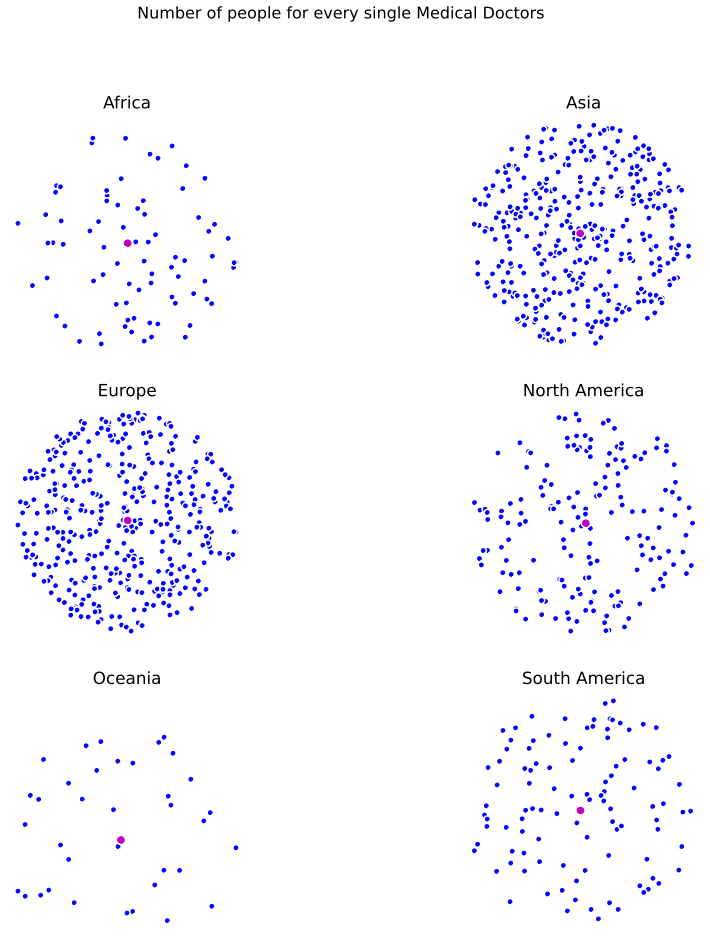

In [20]:
doctors['iso_alpha'] = doctors['Location'].map(country2code)
doctors.dropna(inplace=True)
cont=[]
for r,c in doctors.iterrows():
    country_code = doctors.loc[r,'iso_alpha']
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    
    cont.append(continent_name)
doctors['continent'] =cont
doctors['continent'] =doctors['continent'].map(map_cont)
doctors=doctors.groupby(['continent','Period']).sum()
doctors = doctors.reset_index()

df =doctors[doctors['Period']==2018]
plt.xkcd()
fig =plt.figure(figsize=(15,15))
for i in range(len(df)):
    Nmax = int(df.iloc[i,2])
    R = 5
    r2 = R * np.sqrt(np.random.rand(Nmax, 1))
    theta2 = 2 * np.pi * np.random.rand(Nmax, 1)
    x2 = r2 * np.cos(theta2)
    y2 = r2 * np.sin(theta2)
    plt.subplot(3,2,i+1)
    plt.plot(x2,y2,'b.')
    plt.plot(0, 0, 'mo')
    plt.xlim((-1.1*R,1.1*R))
    plt.ylim((-1.1*R,1.1*R))
    plt.axis('square')
    plt.axis('off')
    plt.title(df.iloc[i,0])

fig.suptitle('Number of people for every single Medical Doctors', fontsize=16)

Though we can see the difference as more availabilty of doctors than a nurse/midwife. The dramatic disparities in the number of people versus the number of health workers across different world regions is also noted. It reveals just how varied the distribution is throughout the world and highlights the unacceptable scarcity of health workers in some regions like Asia and Europe.

## Death rates due to Deadly diseases Vs Suicide 

Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease are categorized under the death rate due to deadly diseases.

Here,the visual analysis on the death rate between crude sucides and deadly diseases are presented.

In [21]:
diseases= pd.read_csv('../input/who-worldhealth-statistics-2020-complete/30-70cancerChdEtc.csv')
print('Death rate of Cardiovascular disease, cancer, diabetes, or chronic respiratory disease')
diseases['death_rate'] = diseases['First Tooltip']
diseases = diseases[diseases['Dim1']=='Both sexes']
diseases.drop(['Indicator','Dim1','First Tooltip'],axis=1,inplace=True)
diseases =diseases[diseases['Period']!=2016]
diseases['type'] = ['Deadly diseases'] * len(diseases)
diseases.head()

Death rate of Cardiovascular disease, cancer, diabetes, or chronic respiratory disease


,Location,Period,death_rate,type
3,Afghanistan,2015,29.8,Deadly diseases
6,Afghanistan,2010,31.7,Deadly diseases
9,Afghanistan,2005,34.1,Deadly diseases
12,Afghanistan,2000,34.4,Deadly diseases
18,Albania,2015,17.4,Deadly diseases


In [22]:
sucide_rate=pd.read_csv('../input/who-worldhealth-statistics-2020-complete/crudeSuicideRates.csv')
sucide_rate['death_rate'] = sucide_rate['First Tooltip']
sucide_rate = sucide_rate[sucide_rate['Dim1']=='Both sexes']
sucide_rate.drop(['Indicator','Dim1','First Tooltip'],axis=1,inplace=True)
sucide_rate= sucide_rate[sucide_rate['Period']!=2016]
sucide_rate['type'] =['suicide']*len(sucide_rate)
print('Death due to crude suicide')
sucide_rate.head()

Death due to crude suicide


,Location,Period,death_rate,type
3,Afghanistan,2015,4.8,suicide
6,Afghanistan,2010,5.1,suicide
9,Afghanistan,2005,6.3,suicide
12,Afghanistan,2000,5.7,suicide
18,Albania,2015,6.0,suicide


In [23]:

death_rate=pd.concat([diseases, sucide_rate])
death_rate.sort_values(by='Period',inplace=True)
fig = px.scatter_geo(death_rate, locations="Location", color="type", size="death_rate",
                     projection="natural earth", locationmode='country names',animation_frame="Period")
fig.show()

Though there are significant decline in the death rate over the years. We can clearly see the sufferings of mental illness more than physical illnes in few of the regions like North America and Europe.

## Miscellaneous 

For now, the other miscellaneous death rate possibilities were considered to be air pollution and road traffic. Reports are seen only in the year 2016.

In [24]:
air_pollution =pd.read_csv('../input/who-worldhealth-statistics-2020-complete/airPollutionDeathRate.csv')
print('Air pollution death rate')
air_pollution['death_rate']=air_pollution['First Tooltip'].str.split('[',n=2,expand=True)[0].str.strip().astype('float')
air_pollution = air_pollution[air_pollution['Dim1']=='Both sexes']
air_pollution.drop(['Indicator','Dim1','Dim2','First Tooltip'],axis=1,inplace=True)
air_pollution['iso_alpha'] = air_pollution['Location'].map(country2code)
air_pollution.dropna(inplace=True)
cont=[]
for r,c in air_pollution.iterrows():
    country_code = air_pollution.loc[r,'iso_alpha']
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    
    cont.append(continent_name)
air_pollution['continent'] =cont
air_pollution['continent'] =air_pollution['continent'].map(map_cont)
air_pollution=air_pollution.groupby(['continent','Period']).mean()
air_pollution['type']= ['Air pollution'] *len(air_pollution)
air_pollution = air_pollution.reset_index()
air_pollution.head()

Air pollution death rate


,continent,Period,death_rate,type
0,Africa,2016,41.130450,Air pollution
1,Asia,2016,27.405479,Air pollution
2,Europe,2016,16.985454,Air pollution
3,North America,2016,15.132667,Air pollution
4,Oceania,2016,27.138083,Air pollution


In [25]:
road_traffic =pd.read_csv('../input/who-worldhealth-statistics-2020-complete/roadTrafficDeaths.csv')
print('Road traffic death rate')
road_traffic['death_rate'] = road_traffic['First Tooltip']
road_traffic.drop(['Indicator','First Tooltip'],axis=1,inplace=True)
road_traffic['iso_alpha'] = road_traffic['Location'].map(country2code)
road_traffic.dropna(inplace=True)
cont=[]
for r,c in road_traffic.iterrows():
    country_code = road_traffic.loc[r,'iso_alpha']
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    
    cont.append(continent_name)
road_traffic['continent'] =cont
road_traffic['continent'] =road_traffic['continent'].map(map_cont)
road_traffic=road_traffic.groupby(['continent','Period']).mean()
road_traffic['type']  = ['Road Traffic']* len(road_traffic)
road_traffic = road_traffic.reset_index()
road_traffic.head()

Road traffic death rate


,continent,Period,death_rate,type
0,Africa,2016,26.739130,Road Traffic
1,Asia,2016,15.858140,Road Traffic
2,Europe,2016,7.248718,Road Traffic
3,North America,2016,15.976471,Road Traffic
4,Oceania,2016,11.109091,Road Traffic


In [26]:
misc =pd.concat([air_pollution, road_traffic])
fig = px.bar(misc, x="continent", y="death_rate",
             color='type', barmode='group',
             height=400)
fig.show()

Pollution taking the lead in the death rate put our global heath at risk. Countries in Africa has higher loss in both road traffic and Air pollution. Though Europe has the lesser death rate in Road traffic, the pollution takes the lives in that region unline North America.

### Conclusion

World Health Statistics report makes clear that the global efforts in recent decades have been paying off. Looking at the most up-to-date data we have on some of these vital SDG indicators, it reveals health trends across Member States, regions and the entire world. Indeed, we are living through extraordinary times. The global outbreak of COVID-19 will have an unprecedented – and as yet unknown – effect on our work towards a healthier world.

---